In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\Me\Downloads\Price.csv\Price.csv', engine = 'python')
datacl = data.drop("index", axis=1)

In [3]:
pivotdata = datacl.pivot_table(values='adjusted_close',index='date',columns='symbol')
pivotdata = pivotdata.dropna(thresh=200,axis=0) ##delete days which has less than 200 companies

In [4]:
returns = pivotdata.pct_change()

In [5]:
countday=0
countcomp=0
#if a company's result is >20, set this result as NaN.
for i in returns.values:
    countcomp=0
    for j in i:
        if j>20:
            returns.values[countday][countcomp] = np.nan
        countcomp=countcomp+1
    countday=countday+1      

In [6]:
scores = returns
scores.index = pd.to_datetime(scores.index)
scores = scores.rolling('365D').std()

In [7]:
grouplabeled = scores
grouplabeled = grouplabeled.dropna(thresh=10,axis=0) ## deletes which days the market has less than 10 companies
grouplabeled

symbol,ABANA,ACIBD,ACSEL,ADANA,ADBGR,ADEL,ADESE,ADNAC,AEFES,AFMAS,...,YKBNK,YKBYO,YKFIN,YKGYO,YKSGR,YONGA,YTFYO,YUNSA,YYAPI,ZOREN
date,,,,,,,,,,,,,,,,,,,,,
1996-11-18,6.655092e-02,NaN,NaN,0.026930,0.039419,0.207892,NaN,0.017249,NaN,NaN,...,0.028927,0.032142,3.132449e-02,NaN,0.092178,NaN,NaN,0.018856,0.103180,NaN
1996-11-19,4.729028e-02,NaN,NaN,0.033416,0.032722,0.174639,NaN,0.013002,NaN,NaN,...,0.026198,0.026890,2.986334e-02,NaN,0.200268,NaN,NaN,0.015611,0.080356,NaN
1996-11-20,3.957294e-02,NaN,NaN,0.044858,0.037981,0.142772,NaN,0.012940,NaN,NaN,...,0.056671,0.037591,3.114483e-02,NaN,0.224265,NaN,NaN,0.020497,0.068821,NaN
1996-11-21,6.096834e-02,NaN,NaN,0.038887,0.034726,0.128057,NaN,0.018002,NaN,NaN,...,0.059921,0.036158,3.830232e-02,NaN,0.200332,NaN,NaN,0.029136,0.061180,NaN
1996-11-22,5.769918e-02,NaN,NaN,0.034805,0.032541,0.115131,NaN,0.016220,NaN,NaN,...,0.054931,0.032536,3.494672e-02,NaN,0.191196,NaN,NaN,0.026594,0.054827,NaN
1996-11-25,8.851486e-02,NaN,NaN,0.031788,0.031071,0.108400,NaN,0.014979,NaN,NaN,...,0.050442,0.029829,3.190561e-02,NaN,0.175310,NaN,NaN,0.024296,0.050177,NaN
1996-11-26,8.254427e-02,NaN,NaN,0.029440,0.029660,0.100473,NaN,0.014842,NaN,NaN,...,0.046906,0.027704,2.996670e-02,NaN,0.168141,NaN,NaN,0.022828,0.048709,NaN
1996-11-27,7.862471e-02,NaN,NaN,0.028110,0.029048,0.094438,NaN,0.013919,NaN,NaN,...,0.044025,0.027690,2.955606e-02,NaN,0.157331,NaN,NaN,0.021585,0.046002,NaN
1996-11-28,7.471029e-02,NaN,NaN,0.029686,0.029645,0.090775,NaN,0.015770,NaN,NaN,...,0.043360,0.026116,2.793068e-02,NaN,0.155602,NaN,NaN,0.020402,0.044576,NaN


In [8]:
count=0
for i in grouplabeled.values:   
    k = pd.qcut(i,5,labels=[1,2,3,4,5],duplicates='drop')
    grouplabeled.values[count] = k
    count=count+1
grouplabeled

symbol,ABANA,ACIBD,ACSEL,ADANA,ADBGR,ADEL,ADESE,ADNAC,AEFES,AFMAS,...,YKBNK,YKBYO,YKFIN,YKGYO,YKSGR,YONGA,YTFYO,YUNSA,YYAPI,ZOREN
date,,,,,,,,,,,,,,,,,,,,,
1996-11-18,4.0,NaN,NaN,3.0,3.0,5.0,NaN,2.0,NaN,NaN,...,3.0,3.0,3.0,NaN,5.0,NaN,NaN,2.0,5.0,NaN
1996-11-19,4.0,NaN,NaN,3.0,3.0,5.0,NaN,1.0,NaN,NaN,...,2.0,2.0,2.0,NaN,5.0,NaN,NaN,1.0,5.0,NaN
1996-11-20,3.0,NaN,NaN,3.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,2.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-21,4.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,2.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-22,4.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,2.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-25,5.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,2.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-26,5.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,1.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-27,5.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,1.0,2.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN
1996-11-28,5.0,NaN,NaN,2.0,2.0,5.0,NaN,1.0,NaN,NaN,...,4.0,1.0,1.0,NaN,5.0,NaN,NaN,1.0,4.0,NaN


In [9]:
odayreturns = pivotdata.pct_change(periods=1) 
odayreturns = odayreturns.shift(periods=-1)

In [10]:
threedayreturns = pivotdata.pct_change(periods=3)
threedayreturns = threedayreturns.shift(periods=-3)

In [11]:
fivedayreturns = pivotdata.pct_change(periods=5)
fivedayreturns = fivedayreturns.shift(periods=-5)

In [12]:
fivedayreturns = fivedayreturns['2002-01-01':]
threedayreturns = threedayreturns['2002-01-01':]
odayreturns = odayreturns['2002-01-01':]
returns = returns['2002-01-01':]
scores = scores['2002-01-01':]
grouplabeled = grouplabeled['2002-01-01':]

In [13]:
groups=[]
#day,comp_indx
def groupper(t): 
    subgroup=[]
    dailygroup=[]
    for i in grouplabeled.values:
        count=0
        for j in i:
            if j==t:
                dailygroup.append(grouplabeled.columns[count])
            count=count+1
        subgroup.append(dailygroup)
        dailygroup=[]
    return subgroup

In [14]:
for i in range(1,6):
        groups.append(groupper(i*1.0))

In [15]:
# [group_no][1,3,5][comp_pos]
def dailygroupreturns(day):  
    resultarray=[]
    diffreturns=[]
    returnsarray1=[]
    returnsarray3=[]
    returnsarray5=[]
    for k in groups:
        for i in k[day]:
            count=0
            for j in odayreturns.columns:
                if j==i:
                    returnsarray1.append(odayreturns.values[day][count])
                count=count+1
            count=0
            for j in threedayreturns.columns:
                if j==i:
                    returnsarray3.append(threedayreturns.values[day][count])
                count=count+1
            count=0
            for j in fivedayreturns.columns:
                if j==i:
                    returnsarray5.append(fivedayreturns.values[day][count])
                count=count+1   
        diffreturns.append(returnsarray1)
        diffreturns.append(returnsarray3)
        diffreturns.append(returnsarray5)
        
        resultarray.append(diffreturns)
        
        returnsarray1 = []
        returnsarray3 = []
        returnsarray5 = []
        diffreturns = []
    return resultarray    

In [16]:
farray = []
#day,group_ind,[1,3,5],comp_ind
t=len(returns.index)
for k in range(t):
    farray.append(dailygroupreturns(k))
    

In [17]:
group1returnby1 =[]
for i in farray:
    group1returnby1.append(np.mean(i[0][0]))
group1returnby3 =[]
for i in farray:
    group1returnby3.append(np.mean(i[0][1]))
group1returnby5 =[]
for i in farray:
    group1returnby5.append(np.mean(i[0][2]))
    
f = {'1dayreturn': group1returnby1  , '3dayreturn':group1returnby3 , '5dayreturn':group1returnby5 ,'index' :returns.index}
finaldfg1 =pd.DataFrame(data=f)
finaldfg1['group_title'] = 'Group1'
finaldfg1

,1dayreturn,3dayreturn,5dayreturn,index,group_title
0,0.024014,0.046980,-0.003578,2002-01-02,Group1
1,0.029180,-0.021850,-0.038786,2002-01-03,Group1
2,-0.009718,-0.056079,-0.065987,2002-01-07,Group1
3,-0.040944,-0.054634,-0.072029,2002-01-08,Group1
4,-0.006068,-0.016114,-0.048976,2002-01-09,Group1
5,-0.008253,-0.026924,-0.035760,2002-01-10,Group1
6,-0.001362,-0.034875,-0.019523,2002-01-11,Group1
7,-0.017360,-0.026167,-0.038727,2002-01-14,Group1
8,-0.016580,-0.000640,0.000328,2002-01-15,Group1
9,0.007147,-0.005293,0.017914,2002-01-16,Group1


In [18]:
group2returnby1 =[]
for i in farray:
    group2returnby1.append(np.mean(i[1][0]))
group2returnby3 =[]
for i in farray:
    group2returnby3.append(np.mean(i[1][1]))
group2returnby5 =[]
for i in farray:
    group2returnby5.append(np.mean(i[1][2]))    
f = {'1dayreturn': group2returnby1  , '3dayreturn':group2returnby3 , '5dayreturn':group2returnby5 ,'index' :returns.index}
finaldfg2 =pd.DataFrame(data=f)
finaldfg2['group_title'] = 'Group2'
finaldfg2

,1dayreturn,3dayreturn,5dayreturn,index,group_title
0,0.030259,0.062923,0.004267,2002-01-02,Group2
1,0.031615,-0.021165,-0.031763,2002-01-03,Group2
2,0.000098,-0.061057,-0.064324,2002-01-07,Group2
3,-0.053068,-0.068490,-0.077520,2002-01-08,Group2
4,-0.008472,-0.008160,-0.051814,2002-01-09,Group2
5,-0.007919,-0.016359,-0.028148,2002-01-10,Group2
6,0.009290,-0.035018,-0.013447,2002-01-11,Group2
7,-0.017881,-0.029072,-0.047366,2002-01-14,Group2
8,-0.026000,-0.003114,-0.030732,2002-01-15,Group2
9,0.016773,-0.002691,0.011686,2002-01-16,Group2


In [19]:
group3returnby1 =[]
for i in farray:
    group3returnby1.append(np.mean(i[2][0]))
group3returnby3 =[]
for i in farray:
    group3returnby3.append(np.mean(i[2][1]))
group3returnby5 =[]
for i in farray:
    group3returnby5.append(np.mean(i[2][2]))  
f = {'1dayreturn': group3returnby1  , '3dayreturn':group3returnby3 , '5dayreturn':group3returnby5 ,'index' :returns.index}
finaldfg3 =pd.DataFrame(data=f)
finaldfg3['group_title'] = 'Group3'
finaldfg3

,1dayreturn,3dayreturn,5dayreturn,index,group_title
0,0.029103,0.058261,0.004501,2002-01-02,Group3
1,0.031089,-0.025418,-0.028446,2002-01-03,Group3
2,-0.001919,-0.046374,-0.036803,2002-01-07,Group3
3,-0.050272,-0.051554,-0.058908,2002-01-08,Group3
4,0.005193,0.013353,-0.037918,2002-01-09,Group3
5,-0.007253,-0.016520,-0.035700,2002-01-10,Group3
6,0.010587,-0.040739,-0.029442,2002-01-11,Group3
7,-0.021777,-0.037198,-0.059412,2002-01-14,Group3
8,-0.026210,-0.017054,-0.041970,2002-01-15,Group3
9,0.010279,-0.012684,-0.006480,2002-01-16,Group3


In [20]:
group4returnby1 =[]
for i in farray:
    group4returnby1.append(np.mean(i[3][0]))
group4returnby3 =[]
for i in farray:
    group4returnby3.append(np.mean(i[3][1]))
group4returnby5 =[]
for i in farray:
    group4returnby5.append(np.mean(i[3][2]))  
f = {'1dayreturn': group4returnby1  , '3dayreturn':group4returnby3 , '5dayreturn':group4returnby5 ,'index' :returns.index}
finaldfg4 =pd.DataFrame(data=f)
finaldfg4['group_title'] = 'Group4'
finaldfg4

,1dayreturn,3dayreturn,5dayreturn,index,group_title
0,0.035648,0.090160,0.043516,2002-01-02,Group4
1,0.037753,0.004354,-0.003512,2002-01-03,Group4
2,0.014966,-0.031442,-0.019269,2002-01-07,Group4
3,-0.046162,-0.051819,-0.054739,2002-01-08,Group4
4,0.003118,0.012444,-0.043304,2002-01-09,Group4
5,-0.005704,-0.008425,-0.033352,2002-01-10,Group4
6,0.021168,-0.034063,-0.024382,2002-01-11,Group4
7,-0.017594,-0.045216,-0.066969,2002-01-14,Group4
8,-0.037817,-0.024653,-0.055036,2002-01-15,Group4
9,0.009402,-0.017132,-0.014113,2002-01-16,Group4


In [21]:
group5returnby1 =[]
for i in farray:
    group5returnby1.append(np.mean(i[4][0]))
group5returnby3 =[]
for i in farray:
    group5returnby3.append(np.mean(i[4][1]))
group5returnby5 =[]
for i in farray:
    group5returnby5.append(np.mean(i[4][2]))    
f = {'1dayreturn': group5returnby1  , '3dayreturn':group5returnby3 , '5dayreturn':group5returnby5 ,'index' :returns.index}
finaldfg5 =pd.DataFrame(data=f)
finaldfg5['group_title'] = 'Group5'
finaldfg5

,1dayreturn,3dayreturn,5dayreturn,index,group_title
0,0.035078,0.091880,0.050065,2002-01-02,Group5
1,0.033530,0.016018,-0.004113,2002-01-03,Group5
2,0.015230,-0.022177,-0.026251,2002-01-07,Group5
3,-0.036616,-0.052395,-0.061638,2002-01-08,Group5
4,-0.005262,-0.007703,-0.056990,2002-01-09,Group5
5,-0.015616,-0.023687,-0.031368,2002-01-10,Group5
6,0.013683,-0.039234,-0.031523,2002-01-11,Group5
7,-0.021849,-0.029898,-0.061411,2002-01-14,Group5
8,-0.032447,-0.023673,-0.055065,2002-01-15,Group5
9,0.023821,-0.010013,-0.013575,2002-01-16,Group5


In [22]:
frames = [finaldfg1,finaldfg2,finaldfg3,finaldfg4,finaldfg5]
result = pd.concat(frames)
resultreverseindexed = result.set_index(['group_title','index'])
resultreverseindexed

1dayreturn  3dayreturn  5dayreturn
group_title index                                         
Group1      2002-01-02    0.024014    0.046980   -0.003578
            2002-01-03    0.029180   -0.021850   -0.038786
            2002-01-07   -0.009718   -0.056079   -0.065987
            2002-01-08   -0.040944   -0.054634   -0.072029
            2002-01-09   -0.006068   -0.016114   -0.048976
            2002-01-10   -0.008253   -0.026924   -0.035760
            2002-01-11   -0.001362   -0.034875   -0.019523
            2002-01-14   -0.017360   -0.026167   -0.038727
            2002-01-15   -0.016580   -0.000640    0.000328
            2002-01-16    0.007147   -0.005293    0.017914
            2002-01-17    0.008844    0.010377    0.018591
            2002-01-18   -0.020730    0.002150   -0.000145
            2002-01-21    0.022442    0.031175    0.013732
            2002-01-22    0.006196    0.006402   -0.010885
            2002-01-23    0.009569   -0.007937   -0.017150
            2002-01-24   -0.010284   -0.027605    0.009929
            2002-01-25   -0.007089   -0.016331    0.021331
            2002-01-28   -0.010352    0.027800    0.016212
            2002-01-29    0.001014    0.039298    0.028648
            2002-01-30    0.037444    0.025800    0.006445
            2002-01-31    0.000880   -0.008387   -0.065909
            2002-02-01   -0.011744   -0.029503   -0.097206
            2002-02-04    0.002755   -0.055455   -0.068283
            2002-02-05   -0.018751   -0.081564   -0.065832
            2002-02-06   -0.036199   -0.046427   -0.037938
            2002-02-07   -0.029007   -0.012101    0.003994
            2002-02-08    0.019331    0.028512    0.008804
            2002-02-11   -0.001093    0.013453   -0.028394
            2002-02-12    0.010694   -0.008616   -0.010189
            2002-02-13    0.005984   -0.036089   -0.040988
...                            ...         ...         ...
Group5      2018-11-23    0.014107    0.022740    0.037811
            2018-11-26    0.010429    0.012328    0.020479
            2018-11-27   -0.003398    0.008487    0.020681
            2018-11-28    0.006303    0.016160    0.032057
            2018-11-29    0.006382    0.017568    0.021734
            2018-11-30    0.000975    0.015366    0.016595
            2018-12-03    0.008345    0.011964    0.017239
            2018-12-04    0.003232    0.005257   -0.013574
            2018-12-05   -0.000366    0.001552   -0.049016
            2018-12-06    0.001266   -0.016850   -0.047055
            2018-12-07    0.000041   -0.049234   -0.063634
            2018-12-10   -0.018206   -0.043733   -0.054556
            2018-12-11   -0.024583   -0.027746    0.022180
            2018-12-12    0.004327    0.009809    0.064787
            2018-12-13   -0.014072    0.021441    0.048862
            2018-12-14    0.013454    0.052731    0.045194
            2018-12-17    0.013853    0.034970    0.035081
            2018-12-18    0.015896    0.009181   -0.000652
            2018-12-19    0.001520    0.002091   -0.010206
            2018-12-20   -0.009465   -0.019050   -0.015534
            2018-12-21    0.009442   -0.000107    0.003032
            2018-12-24   -0.017884   -0.012353   -0.005803
            2018-12-25    0.007451    0.009973   -0.002542
            2018-12-26   -0.004836   -0.000089   -0.027455
            2018-12-27    0.005875   -0.008260   -0.013331
            2018-12-28    0.000249   -0.026796         NaN
            2018-12-31   -0.010840   -0.015154         NaN
            2019-01-02   -0.014201         NaN         NaN
            2019-01-03    0.010163         NaN         NaN
            2019-01-04         NaN         NaN         NaN

[21370 rows x 3 columns]

In [23]:
count=0
d1=[]
while(count<5):
    groupno= 'Group'+ str(count+1)  
    d1.append(resultreverseindexed['1dayreturn'][groupno].mean())  
    count=count+1
count=0
d3=[]
while(count<5):
    groupno= 'Group'+ str(count+1)  
    d3.append(resultreverseindexed['3dayreturn'][groupno].mean())  
    count=count+1
count=0
d5=[]
while(count<5):
    groupno= 'Group'+ str(count+1)  
    d5.append(resultreverseindexed['5dayreturn'][groupno].mean())  
    count=count+1

In [24]:
fres = {'1dayreturn':d1   , '3dayreturn':d3 , '5dayreturn':d5, 'index':['Group1','Group2','Group3','Group4','Group5']}
finalresult =pd.DataFrame(data=fres)
finalpivot = finalresult.set_index('index')
finalpivot

,1dayreturn,3dayreturn,5dayreturn
index,,,
Group1,0.000597,0.001769,0.002980
Group2,0.000922,0.002807,0.004674
Group3,0.000958,0.002881,0.004867
Group4,0.000868,0.002672,0.004486
Group5,0.003404,0.004604,0.004493


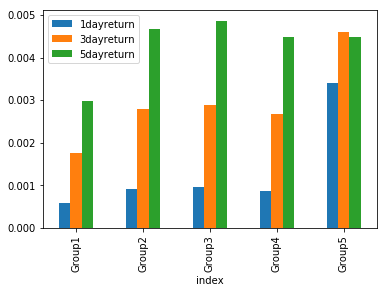

In [25]:
finalpivot.plot(kind='bar')

In [26]:
finalpivot['1dayreturn'] = finalpivot['1dayreturn'] - finalpivot['1dayreturn'].mean()
finalpivot['3dayreturn'] = finalpivot['3dayreturn'] - finalpivot['3dayreturn'].mean()
finalpivot['5dayreturn'] = finalpivot['5dayreturn'] - finalpivot['5dayreturn'].mean()
finalpivot

,1dayreturn,3dayreturn,5dayreturn
index,,,
Group1,-0.000753,-0.001178,-0.001320
Group2,-0.000427,-0.000140,0.000374
Group3,-0.000392,-0.000066,0.000567
Group4,-0.000482,-0.000275,0.000186
Group5,0.002054,0.001657,0.000193


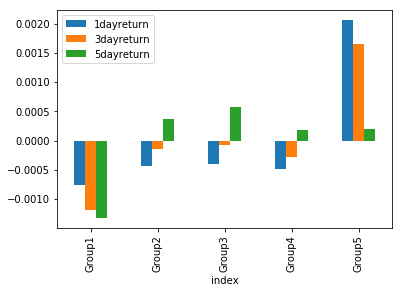

In [27]:
finalpivot.plot(kind='bar')